# 서포트 벡터 머신(Support Vector Machines)

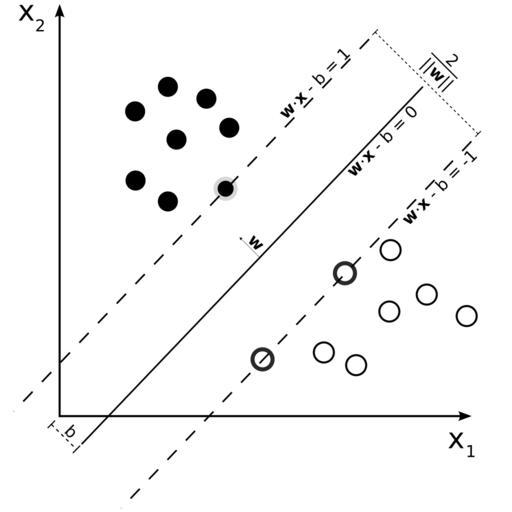

* 서포트 벡터 머신(SVM)은 매우 강력하고 선형이나, 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델임
* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행
* 머신러닝에서 인기있는 모델임 반드시 익혀야 모델임
*  SVM 은 복잡한 분류 문제에 잘 들어 맞으며, 작거나 중간 크기의 데이터 셋에 적합하다.
* SVM은 특성스케일에 아주 민감하다.(sklearn의  standard scaler를 사용 권장)

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [2]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

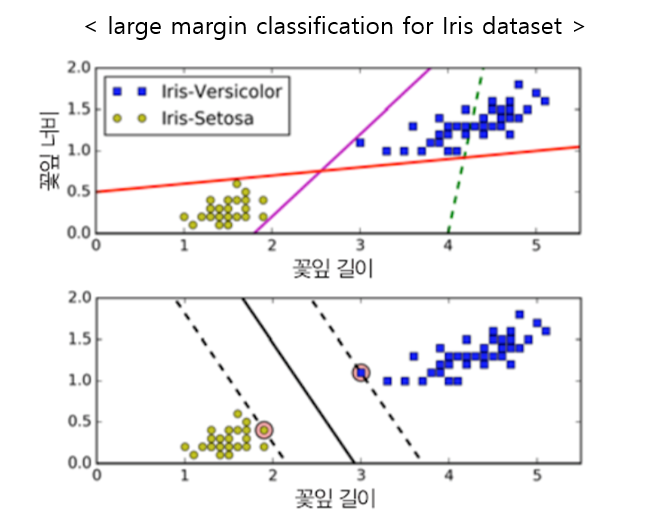

* 위 그림의 iris 데이터셋을 보면 SVM을 표현한 것임
* 첫 번째 그림의 실선은 두 개의 클래스를 잘 분류하지 못하고 있다.
* 첫 번째 그림의 다른 두 모델 분류기는 정확히 분류는 하고 있으나, 모델 분류기의 선이 훈련 데이터와 너무 가까워서, 만약 새로운 new 데이터가 온다면 정확히 분류하지 못할 수도 있다.
* 두 번째 그림은 SVM 분류기의 결정 경계이다.
* 이 직선은 두 개의 클래스를 나누고 있을 뿐만 아니라, 클래스를 나누는 결정경계가 훈련샘플로부터 최대한 멀리 떨어져 있다.
* 그래서 SVM 분류기는 클래스 사이의 가장 폭이 넓은 구간을 찾는 것으로 이해할 수 있다. 그리고 이를 large margin classification(라지 마진 분류)라고 부른다.
* 방금 말한 SVM의 목적 때문에, 마진 구간 바깥쪽의 데이터는 결정 경계에 전혀 영향을 주지 않고, 오로지 마진 구간 근처에 위치한 샘플에만 결정경계는 영향을 받게 된다.
* 그리고 이렇게 영향을 주는 샘플들을 Support Vector(서포트 벡터)라고 부른다.
* SVM 개요에서 말한 것처럼 SVM은 특성 스케일에 민감하므로, 보통 사이킷런의 StandardScaler을 사용하면 결정경계의 명확성을 높일 수 있다.

In [4]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [7]:
iris = datasets.load_iris()
x = iris['data'][:,(2,3)] # iris 예제 데이터 중 꽃잎의 길이, 너비 변수 사용
y = (iris['target']== 2).astype('int')

# 사이킷런의 파이프라인 라이브러리를 통해서 데이터 스케일과 모델 적합을 한번에 할 수 있음.
svm_clf = Pipeline([
    ('scaler', StandardScaler()),   #  데이터 스케일 단계
    ('linear_svc', LinearSVC(C=1, loss = 'hinge')) # 선형 SVM 모델 단계
])

#  모델 훈련
svm_clf.fit(x,y)

#  꽃잎길이 5.5cm, 너비 1.7cm의 iris 데이터를 예측한다고 가정
new_iris = [[5.5,1.7]]
prediction = svm_clf.predict(new_iris)[0]
print(prediction)    # 1: Versinica : Trus(1)

1


In [8]:
from sklearn.svm import SVC
model = SVC(kernel ='rbf', probability= True)
model.fit(x,y)
prob = model.predict_proba(new_iris)
print(prob)  # Vesfinica 가 False 일 3.7% 확률과 True 일 확률 96.2%

[[0.03341364 0.96658636]]


* SVM 분류기는 기존 로지스틱 회귀처럼 클래스에 대한 확률, 즉 predict_proba() 메서드를 제공하지 않지만, SVC모델안에 probability=True 매개변수를 주게되면 predict_proba()메서드 사용 가능
* 위 방법말고, SVC(kernel='linear',C=1)과 같이 SVC 모델을 사용 가능 (훈련세트가 커지면 속도 느려져 권장 X)
*  c는 규제항으로 cost 의 약자로  얼마나 많은 데이터 샘플이 다른 클래스에 놓이는 것을 허용하는지를 결정한다.   C의 유무에 따라 하드마진(hard-margin) SVM, 소프트마진(soft-margin) SVM이라고 불린다.

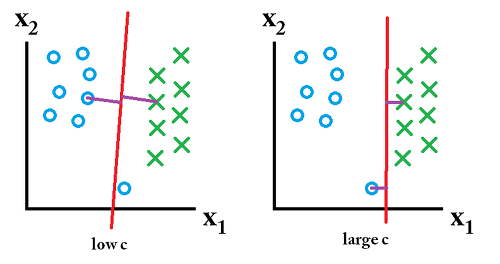

* 위 방법말고, SGDClassifier(loss='hinge', alpha=1/(m*C)) <m = 샘플수>를 사용 할 수 있다. 이는 LinearSVC만큼 빠르게 수렴하지는 않지만 데이터셋이 아주 커서 메모리에 적재 불가능하거나, 온라인 학습으로 분류 문제를 다룰 때는 유용하다

 * 커널 기법은 주어진 데이터를 고차원 특징 공간으로 사상해주는 것이다.
 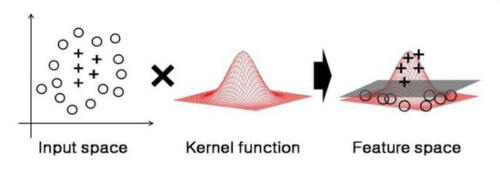
 * 커널에는 Polynomial 커널, Sigmoid 커널, 가우시안 RBF 커널 등 종류가 많음
 * 그 중 가장 성능이 좋아 자주 사용되는 것이 가우시안 RBF 커널임
 * 각 커널마다 최적화를 도와주는 매개변수들이 따로 있고 RBF 커널의 경우 gamma라는 매개변수를 사용자가 조정해야함
 * SVM의 기본 매개변수인 C도 있으므로 총 2개의 매개변수를 설정해줘야함.
 * gamma의 역할은 하나의 데이터 샘플이 영향력을 행사하는 거리를 결정한다. gamma는 가우시안 함수의 표준편차와 관련되어 있는데, 클수록 작은 표준편차를 갖는다.
 * 즉, gamma가 클수록 한 데이터 포인터들이 영향력을 행사하는 거리가 짧아지는 반면, gamma가 낮을수록 커진다.
 * 요약 : SVM 알고리즘 중에서 가장 성능이 괜찮고 일반적으로 널리 사용되는 것은 RBF 커널 SVM이고, 좋은 성능을 얻으려면 매개변수인 C와 gamma를 잘 조정해줘야 한다. C는 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도를 결정하고, gamma는 결정 경계의 곡률을 결정한다. 두 값 모두 커질수록 알고리즘의 복잡도는 증가하고, 작아질수록 복잡도는 낮아진다. 일반적으로 grid search로 경험적으로 최적의 매개변수 값들을 찾아가는데, 이상 설명한 내용을 어느 정도 숙지하고 있다면 훨씬 더 빠르게 좋은 성능을 내는 매개변수 값들을 찾아낼 수 있을 것이다.

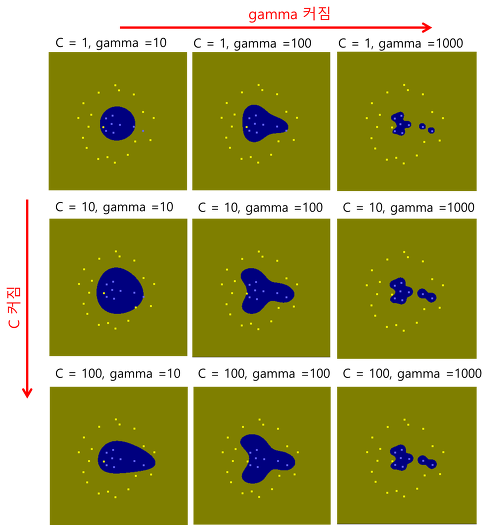

# 비선형 SVM
* 선형 SVM이 많은 경우에서 잘 작동하지만, 데이터셋 자체가 선형으로 잘 분류할 수 없는 경우도 많다.
* 간단히 이러한 데이터셋에서는 다항 특성(polynomial)인 아래와 같은 특성을 추가하면 된다.

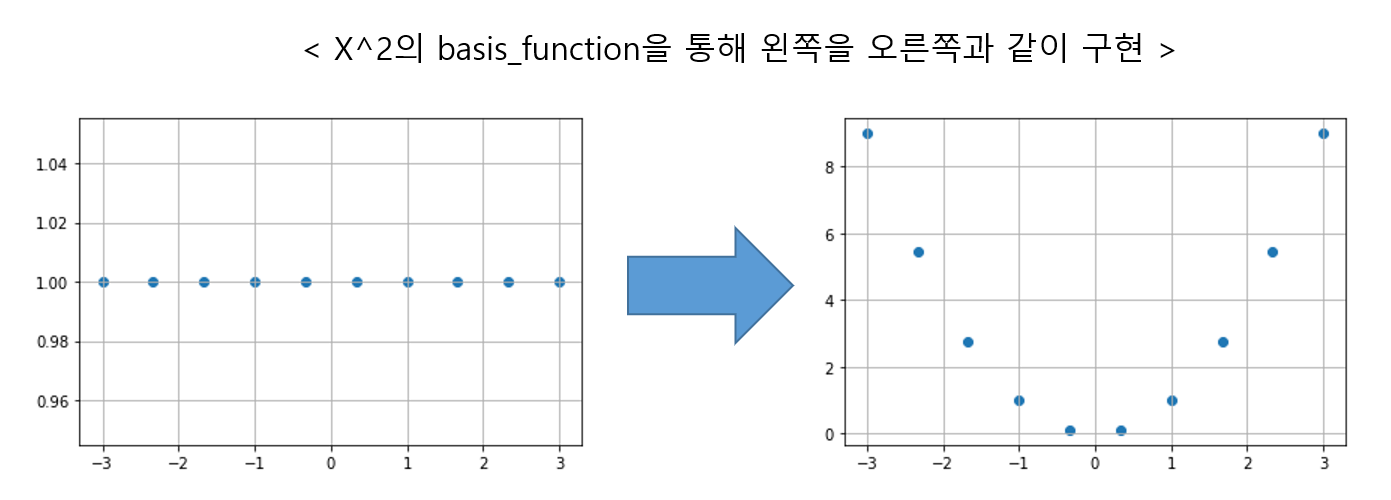

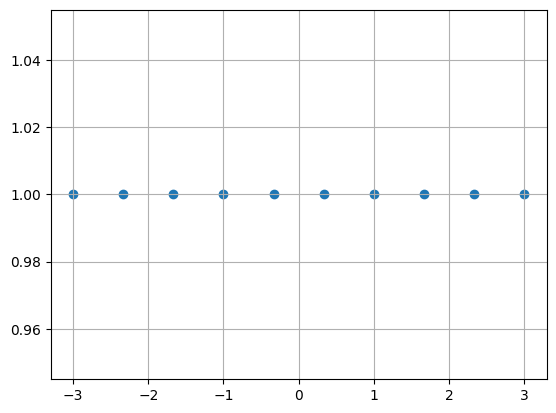

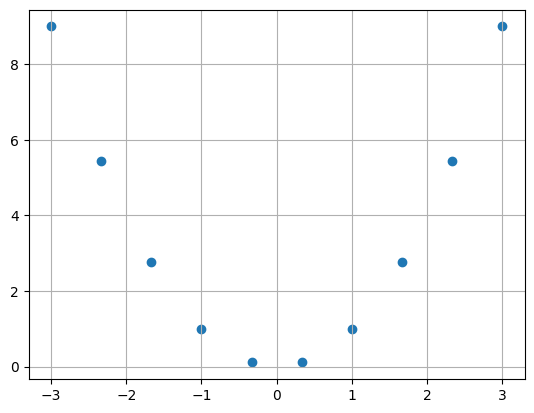

In [10]:
import matplotlib.pyplot as plt
x= np.linspace(-3,3,10)
y = np.linspace(1,1,10)
plt.scatter(x,y)
plt.grid()
plt.show()
b_func = x**2
plt.scatter(x,b_func)
plt.grid()
plt.show()

## make moons 데이터 학습

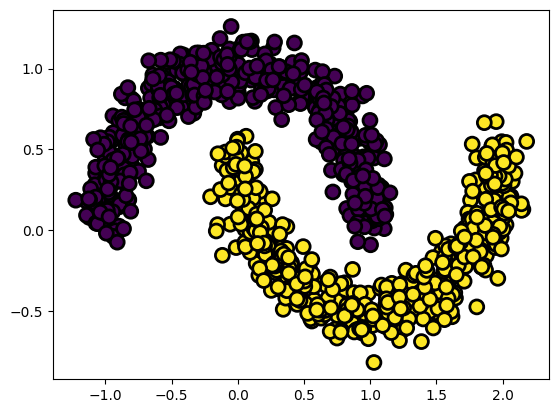

In [14]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

#  샘플 수 1000개, noise 값 0.1, random_state = 2022
x,y = make_moons(n_samples = 1000, noise = 0.1, random_state=2022)
plt.scatter(x[:,0], x[:,1], marker ='o', c= y, s=100, edgecolor ='black', linewidth = 2)
plt.show()

In [15]:
#  변수변환 : polynomial 3 차 다항식 사용, scaler: StadardScaler 사용, 모델 :LinearSVN(C=10, loss ='hunge)사용
polynomial_std_svm = Pipeline([
    ('polynomial', PolynomialFeatures(degree=3)), # 비선형으로
    ('std', StandardScaler()),
    ('svm',LinearSVC(C=10, loss ='hinge'))
])

# 모델학습
polynomial_std_svm.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('polynomial', PolynomialFeatures(degree=3)),
                ('std', StandardScaler()),
                ('svm', LinearSVC(C=10, loss='hinge'))])

예측

In [16]:
# 첫번째 변수값: 2.0, 두번째 변수값: 1.0인 새로운 데이터 예측
new_moon = [[2.0,1.0]]
polynomial_std_svm.predict(new_moon)

array([1])

* hinge loss 은 분류기, 특히 SVM 훈련에 사용되는 손실 함수입니다. default 값으로 사용됨
* sj는 정답이 아닌 클래스의 score
* syi는 정답클래스 score
* 조건에서 만약 '정답'클래스(syi)가 정답이 아닌 클래스 (sj) + safety margin(여기서1) 값보다 크면 loss는 0이다!라는 것임
* 만약 위조건이 아니면 즉, 정답이 '아닌' 클래스(sj)-정답클래스 + safety margin(여기서1)의 값을 loss로 가져가라 라는 의미
* 정리하면 정답클래스가 아닌 클래스보다 safety margin 보다 크면 그냥 그건 loss가 0이고 loss가 0은 매우 좋다는 의미임

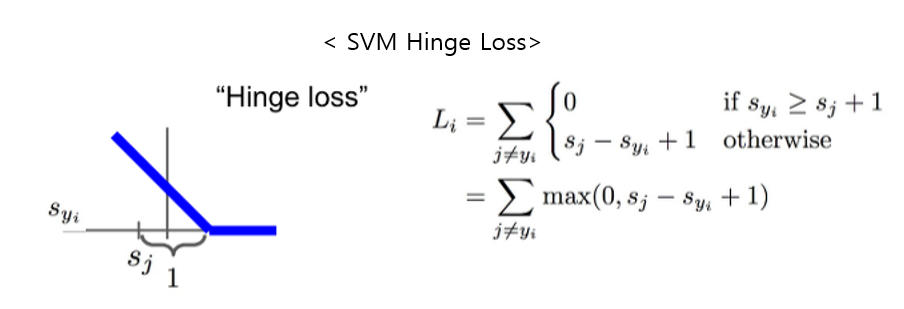

### SVM을 사용한 회귀 모델 (SVR)

In [21]:
boston = pd.read_csv('Boston_house.csv')
data = boston
label = boston['Target']
del boston['Target']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state =2022)
model = SVR()
model.fit(X_train, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.1814771039213966
평가 데이터 점수 : 0.3080993151888277


SVM을 사용한 분류 모델 (SVC)

In [25]:
X,y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2022, test_size=0.2)

model = SVR()
model.fit(X_train, y_train)

print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.72632814909695
평가 데이터 점수 : 0.7628373444653023


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원
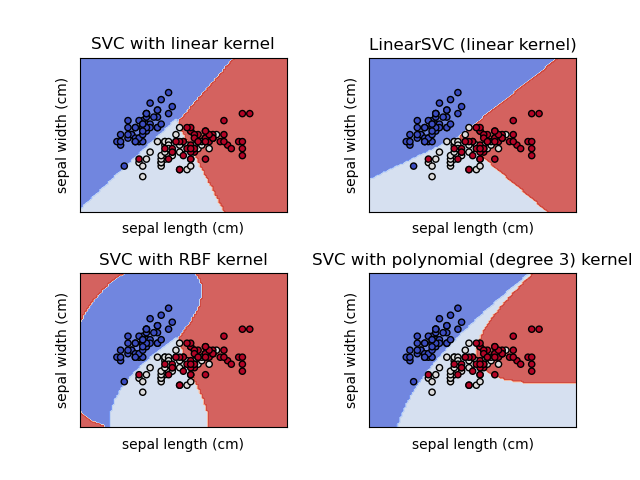

# 커널(다항식, 가우시안RBF)
## 다항식 커널

* 다항식 특성(PolynomialFeatures)을 추가하는 것처럼 간단하고 모든 머신러닝 알고리즘에서 잘 동작한다.
* 하지만 낮은 차수의 다항식은 복잡한 모델을 표현하기 쉽지 않기 때문에, 굉장히 많은 차수를 사용하여서 모델을 학습해야한다.
* 그런데 많은 차수를 사용한 모델은 학습속도를 무시무시하게 떨어트리고 심지어 동작 자체를 안하는 경우도 있다.
* 데이터 변환을 통해 비선형적인 데이터를 분류를 하고 싶고, 모델 학습에도 지장을 주지 않는 효율적인 방법은 없을까라는 고민끝에, SVM을 사용할 땐 kernel trick이라는 수학적 기교를 사용할 수 있다.
* 실제로 특성을 추가하지 않았음에도, 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다.
* 다시 moons 데이터셋을 통한 실습

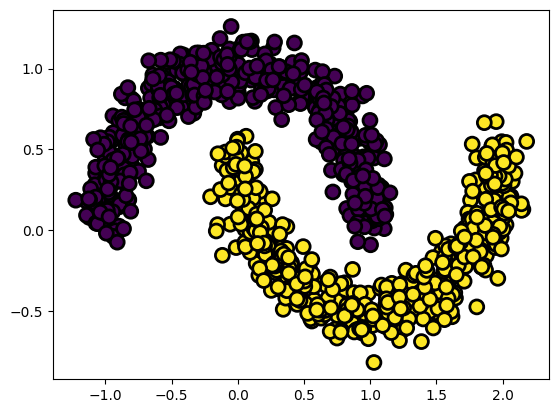

In [26]:
x,y = make_moons(n_samples = 1000,noise = 0.1, random_state=2022)
plt.scatter(x[:,0],x[:,1], marker = 'o', c=y, s=100, edgecolor = 'black', linewidths=2)


In [37]:
from sklearn.svm import SVC
# kernel ='poly(degree=3)'사용
# 매개변수 coef0는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절하는 것
# coef0을 적절한 값으로 지정하면 고차항의 영향을 줄일 수 있다.(coef0의 default=0)
poly_kernel_std_svm = Pipeline([
    ('std',StandardScaler()),
    ('poly_kernel_svm',SVC(kernel='poly', degree=3, coef0=1, C=5))
    # coef = 적절한 값을 넣으면 고차항의 영향을 줄일수 있는지 즉 고차항의  기울기값을 줄여서 영향력을 줄여줌
    # c는소프트마진 인지 하드 마진인지 얼마나 오차를 허용할것인지 큰 값일수록 소프트해지고 작은값은 하드해짐

])
poly_kernel_std_svm.fit(x,y)

Pipeline(steps=[('std', StandardScaler()),
                ('poly_kernel_svm', SVC(C=5, coef0=1, kernel='poly'))])

## 가우시안 RBF 커널

* 다항 특성 방식과 마찬가지로 유사도 특성 방식을 모델에 적용할 수 있다.
* 다항식 커널에서 말한 것과 같이 추가 특성을 계산하려면 엄청난 시간과 비용이 발생한다. (특히 훈련 세트가 클 경우 심해짐)
* 하지만 마찬가지로 커널 트릭 방식을 사용하면, 실제 특성을 추가하지 않고 유사도 특성을 많이 추가한 것과 같은 효과를 얻을 수 있다.

In [38]:
# 하이퍼파라미터 r(gamma)는 규제 역할을 한다.
# (모델이 과적합일 경우 => r 감소 시키고, 모델 과소적합일 경우 => r 증가시켜야함)
# 하이퍼파라미터 C도 r(gamma)와 비슷한 성격을 띈다.
# 모델 복잡도를 조절하기 위해 gamma와 C를 함께 조절해야 한다.
# Tip(하이퍼파라미터 조절): 그리드 탐색법 사용(그리드 큰 폭 => 그리드 작은 폭) : 줄여가면서 탐색
rbf_kernel_std_svm = Pipeline([
    ('std', StandardScaler()),
    ('rbf_kernel_svm',SVC(kernel= 'rbf', gamma =3, C=0.001))
])
rbf_kernel_std_svm.fit(x,y)

Pipeline(steps=[('std', StandardScaler()),
                ('rbf_kernel_svm', SVC(C=0.001, gamma=3))])

* regression,  classification 이론 및 모형들 통해서 전반적인 supervised learning의 이해를 하였음
* 앞으로 배울 decision tree, ensemble의 내용도 sklearn의 구조에서 크게 벗어나지 않기 때문에 학습하는데 어려움이 많지 않을 것임

In [44]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =2022, test_size=0.2)

linear_model = SVR(kernel='linear')
linear_model.fit(X_train, y_train)

print('linear svr 학습 데이터 점수 : {}'. format(linear_model.score(X_train, y_train)))
print('linear svr 평가 데이터 점수 : {}'. format(linear_model.score(X_test, y_test)))

polynomial_model = SVR(kernel='poly')
polynomial_model.fit(X_train, y_train)

print('polynomial svr 학습 데이터 점수 : {}'. format(polynomial_model.score(X_train, y_train)))
print('polynomial svr 평가 데이터 점수 : {}'. format(polynomial_model.score(X_test, y_test)))


rbf_model = SVR(kernel='rbf')
rbf_model.fit(X_train, y_train)

print('rbf svr 학습 데이터 점수 : {}'. format(rbf_model.score(X_train, y_train)))
print('rbf svr 평가 데이터 점수 : {}'. format(rbf_model.score(X_test, y_test)))


linear svr 학습 데이터 점수 : 0.44724536576534046
linear svr 평가 데이터 점수 : 0.3800635328031119
polynomial svr 학습 데이터 점수 : 0.5301563281002
polynomial svr 평가 데이터 점수 : 0.5568872256684163
rbf svr 학습 데이터 점수 : 0.72632814909695
rbf svr 평가 데이터 점수 : 0.7628373444653023


In [42]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =2022, test_size=0.2)

linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)

print('linear svc 학습 데이터 점수 : {}'. format(linear_model.score(X_train, y_train)))
print('linear svc 평가 데이터 점수 : {}'. format(linear_model.score(X_test, y_test)))

polynomial_model = SVC(kernel='poly')
polynomial_model.fit(X_train, y_train)

print('polynomial svc 학습 데이터 점수 : {}'. format(polynomial_model.score(X_train, y_train)))
print('polynomial svc 평가 데이터 점수 : {}'. format(polynomial_model.score(X_test, y_test)))


rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)

print('rbf svc 학습 데이터 점수 : {}'. format(rbf_model.score(X_train, y_train)))
print('rbf svc 평가 데이터 점수 : {}'. format(rbf_model.score(X_test, y_test)))


linear svc 학습 데이터 점수 : 0.9648351648351648
linear svc 평가 데이터 점수 : 0.9298245614035088
polynomial svc 학습 데이터 점수 : 0.9142857142857143
polynomial svc 평가 데이터 점수 : 0.9035087719298246
rbf svc 학습 데이터 점수 : 0.9186813186813186
rbf svc 평가 데이터 점수 : 0.9122807017543859


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [45]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
polynomial_model = SVC(kernel ='poly', degree =2, C=0.1, gamma = 'auto')
polynomial_model.fit(X_train, y_train)

print('kernel = poly, degree={}, C={}, gamma={}'.format(2,0.1,'auto'))
print('polynomial svc 학습 데이터 점수 : {}'.format(polynomial_model.score(X_train, y_train)))
print('polynomial svc 평가 데이터 점수 : {}'.format(polynomial_model.score(X_test, y_test)))

kernel = poly, degree=2, C=0.1, gamma=auto
polynomial svc 학습 데이터 점수 : 0.9758241758241758
polynomial svc 평가 데이터 점수 : 0.9824561403508771


In [47]:
rbf_model = SVC(kernel='rbf', C=2.0, gamma ='auto')
rbf_model.fit(X_train, y_train)

print('kernel = rbf, degree={}, C=[], gamma={}'. format(2,0.1,'auto'))
print('rbf svc  학습 데이터 점수 : {}'.format(rbf_model.score(X_train, y_train)))
print('rbf svc 평가 데이터 점수 : {}'.format(rbf_model.score(X_test, y_test)))


kernel = rbf, degree=2, C=[], gamma=0.1
rbf svc  학습 데이터 점수 : 1.0
rbf svc 평가 데이터 점수 : 0.6491228070175439


데이터 전처리
SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [48]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
model = SVC()
model.fit(X_train, y_train)

print('svc 학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('svc 평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

svc 학습 데이터 점수 : 0.9120879120879121
svc 평가 데이터 점수 : 0.956140350877193


In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
#  스케일러 후 모델
model = SVC()
model.fit(X_train , y_train)

print('svc 학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('svc 평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

svc 학습 데이터 점수 : 0.9846153846153847
svc 평가 데이터 점수 : 1.0


In [54]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [57]:
# minmax 스케일러 후 모델
model = SVC()
model.fit(X_train, y_train)

print('svc 학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('svc 평가 데이터 점수 :{}'.format(model.score(X_test, y_test)))

svc 학습 데이터 점수 : 0.9802197802197802
svc 평가 데이터 점수 :0.9035087719298246


## Linear SVR

보스톤 주택 가격

In [64]:
boston = pd.read_csv('Boston_house.csv')
data = boston
label = boston['Target']
del boston['Target']

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 2019)

In [65]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
model = SVR(kernel ='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [67]:
print('SVR학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVR평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

SVR학습 데이터 점수 : 0.7244226615768916
SVR평가 데이터 점수 : 0.5964897569374126


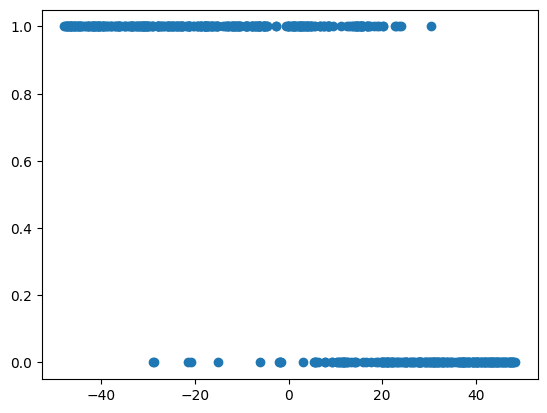

In [68]:
#  서포트백터는 차원을 늘려줘서 분류를 하게 되는데 TSNE로 차원을 낮춰줘서 시각화를 할 수 있음.
# t-SNE는 고차원 데이터를 저차원으로 변환하여 시각화에 주로 사용.
# 데이터 X를 1차원으로 축소 ->n_components 매개변수는 변환된 데이터의 차원을 지정.
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y)

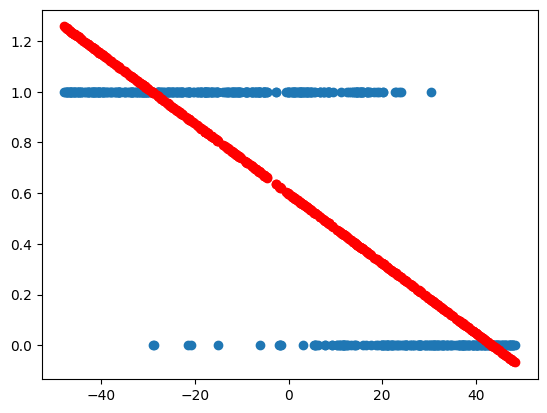

In [69]:
model.fit(X_comp,y)
predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp, predict, color='r')
# 넓게 퍼져있어 예측값이 많이 떨어진 것을 볼 수 있음.

In [72]:
#  크로스 벨류로 파이프라인 만들기
estimator = make_pipeline(StandardScaler(), SVR(kernel ='linear'))
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True)
# 크로스 val로 값을 나타내줌

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    3.1s finished


{'fit_time': array([0.56608415, 0.40232563, 0.36415315, 0.43705678, 0.44040775]),
 'score_time': array([0.00989461, 0.00364041, 0.00372577, 0.00369501, 0.00375676]),
 'test_score': array([0.60344367, 0.66391728, 0.74997599, 0.78640276, 0.70282083])}

In [75]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model',SVR(kernel ='linear'))
])

param_grid = [{'model__gamma': ['scale','auto'],
               'model__C': [1.0,0.1,0.01],
               'model__epsilon':[1.0,0.1,0.01]}]

gs = GridSearchCV(
    estimator =pipe,
    param_grid = param_grid,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [76]:
# 3X3X3개의 분석을 돌려야 되는데 최고의 측정기는 아래와 같음
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='linear'))])

당뇨병

In [77]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
model  = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [80]:
print('SVR학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVR평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

SVR학습 데이터 점수 : 0.5005253068607691
SVR평가 데이터 점수 : 0.5014186822519405


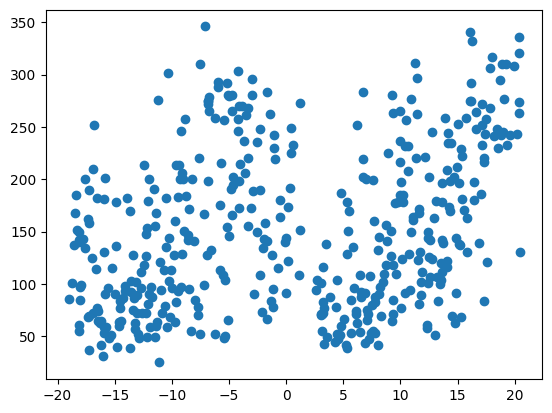

In [81]:
# 서포트백터는 차원을 늘려줘서 분류를 하게되는데 TSNE로 차원을 낮춰줘서 시각화를 할 수 있음
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

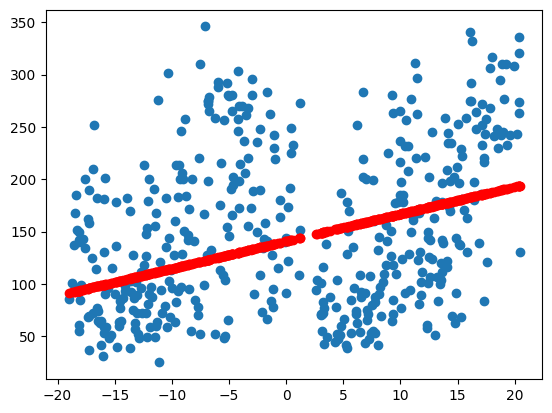

In [82]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')

In [83]:
# 크로스 벨류로 파이프 라인 만들기
estimator = make_pipeline(StandardScaler(), SVR(kernel='linear'))
cross_validate(
    estimator= estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
# 크로스 val로 값을 나타내줌

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02052379, 0.01995182, 0.01336122, 0.01426673, 0.00878429]),
 'score_time': array([0.00293875, 0.00288749, 0.00277495, 0.00257516, 0.00182486]),
 'test_score': array([0.43039087, 0.51655019, 0.48275821, 0.4224617 , 0.53077081])}

In [84]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='linear'))])
param_grid = [{'model__gamma':['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon':[1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [85]:
# 3X3X2개의 분석을 돌려야 되는데 최고의 측정기는 아래와 같음
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

보스턴 주택 가격

In [86]:
boston = pd.read_csv('Boston_house.csv')
data = boston
label = boston['Target']
del boston['Target']
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2019)

In [87]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
model  = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [89]:
print('SVR학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVR평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

SVR학습 데이터 점수 : 0.6826731964520371
SVR평가 데이터 점수 : 0.6501911899172725


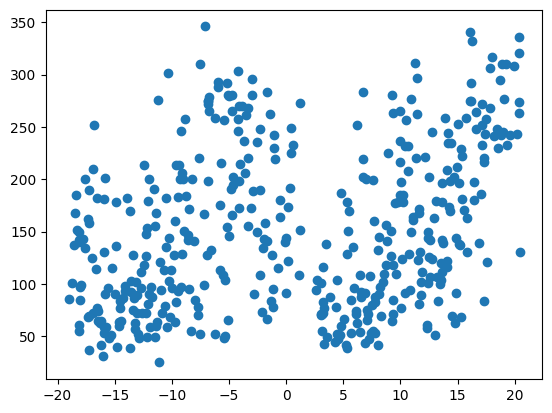

In [90]:
# 서포트백터는 차원을 늘려줘서 분류를 하게되는데 TSNE로 차원을 낮춰줘서 시각화를 할 수 있음
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)

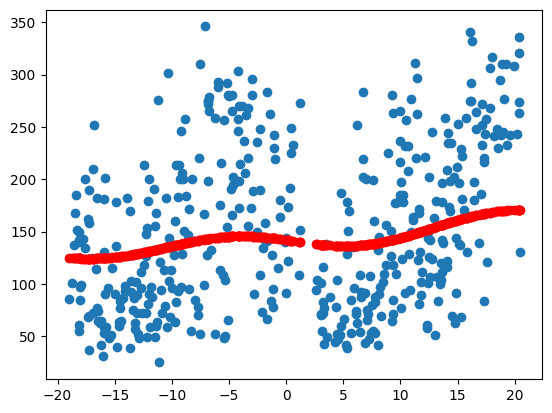

In [91]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')
#커널을 RBF로 줘서 비선형으로 예측 데이터를 좀더 반영잘 한것 같음

In [92]:
# 크로스 벨류로 파이프 라인 만들기
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator= estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
# 크로스 val로 값을 나타내줌

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.03770399, 0.03260875, 0.03489232, 0.03257704, 0.01584768]),
 'score_time': array([0.01221251, 0.00866556, 0.01238632, 0.01434398, 0.00362206]),
 'test_score': array([0.14580768, 0.12539699, 0.18163843, 0.12222929, 0.15792104])}

In [93]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))]) #기본이 RBF일거임
param_grid = [{'model__kernel':['rbf' ,'poly', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'poly', 'sigmoid']}],
             verbose=True)

In [94]:
#  결과는 현재 rbf가 3개중 가장 좋은 성능을 보여줌
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [95]:
#rbf가 잘 나왔기 때문에 rbf만 고정하고 여러가지 돌려봄
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))]) #기본이 RBF일거임
param_grid = [{'model__gamma':['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon':[1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [96]:
gs.best_estimator_#  ...c=1

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=0.01, gamma='auto'))])

당뇨병

In [97]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [98]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
model  = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [100]:
print('SVR학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVR평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

SVR학습 데이터 점수 : 0.18365592613369752
SVR평가 데이터 점수 : 0.11721513181408783


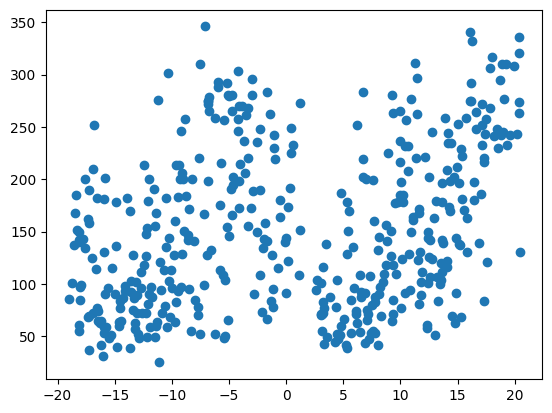

In [101]:
# 서포트백터는 차원을 늘려줘서 분류를 하게되는데 TSNE로 차원을 낮춰줘서 시각화를 할 수 있음
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y)
# 데이터가 너무 퍼져있어서임

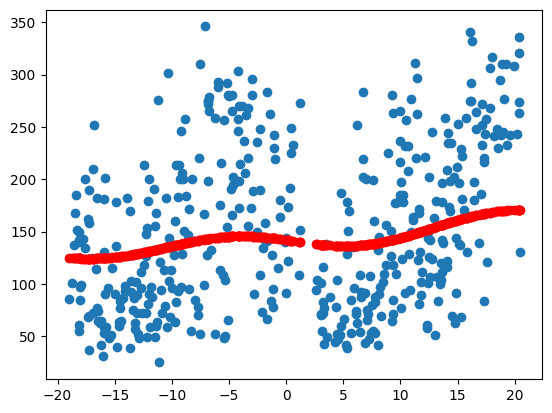

In [102]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color='r')
#커널을 RBF로 줘서 비선형으로 예측

In [103]:
# 크로스 벨류로 파이프 라인 만들기
estimator = make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator= estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
# 크로스 val로 값을 나타내줌

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.03749251, 0.02606416, 0.01362848, 0.01349688, 0.00938177]),
 'score_time': array([0.00524092, 0.01180649, 0.0046742 , 0.00498414, 0.00249648]),
 'test_score': array([0.14580768, 0.12539699, 0.18163843, 0.12222929, 0.15792104])}

In [104]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='rbf'))]) #기본이 RBF일거임
param_grid = [{'model__kernel':['rbf' ,'poly', 'sigmoid']}]

gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'poly', 'sigmoid']}],
             verbose=True)

In [105]:
#  결과는 현재 rbf가 3개중 가장 좋은 성능을 보여줌
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [106]:
#sigmoid가 잘 나왔기 때문에 rbf만 고정하고 여러가지 돌려봄 별 성능차이능 없음
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVR(kernel='sigmoid'))]) #기본이 RBF일거임
param_grid = [{'model__gamma':['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon':[1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [107]:
# 베스트로 나온 것을 모델로 다시 fit해주고 성능을 평가해보자
model = gs.best_estimator_
model.fit(X_train, y_train)
print('SVR학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVR평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))
# 그나마 점수가 30프로대로 올라감

SVR학습 데이터 점수 : 0.3966987411062787
SVR평가 데이터 점수 : 0.29874388597989454


## Linear SVC

### 유방암

In [108]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [109]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
model  = SVC(kernel='linear') # rbf에서 linear로 변경
model.fit(X_train, y_train)

SVC(kernel='linear')

In [111]:
print('SVC학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVC평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

SVC학습 데이터 점수 : 0.989010989010989
SVC평가 데이터 점수 : 0.9736842105263158


In [112]:
#시각화가 아래 있지만 변경해야 할것 같음 함수로 만들예정임
#svr과 다르게 svc는 데이터를 보여준후 클래스 구분이 되는 시각화를 추가
#meshgrid  : 좌표 벡터에서 좌표 행렬을 반환합니다. 1차원 좌표 배열 x1, x2,…, xn이 주어지면 N차원 직사각형 격자를 만드는 함수
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1 # 데이터에서 최소 좌표와 최대 자표를 지정할때 -1 +1을 해줘서 좀더 여유있게 해주기 위함
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), #h는 간격 0.02 r간격으로 그리드 좌표를 만듬
                         np.arange(y_min, y_max, h))
    return xx, yy

In [113]:
# 컨타워 함수를 만들어줌
def plot_contours(clf, xx, yy, **params):
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel은 평평하게 만들기 flatten과 유사
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy, Z, **params) #컨투어를 그리는 contourf함수에 **params내에 색깔 등을 넣어줄수 있으므로 파람으로 받아옴
    return out
# 두개를 잘 쓰면 classfication visualization도 잘 활용할 수 있음
# https://velog.io/@hajeongjj/np.meshgrid 참고

In [114]:
# 서포트백터는 차원을 늘려줘서 분류를 하게되는데 TSNE로 차원을 낮춰줘서 시각화를 할 수 있음
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] #0과 1로 구분을 해줌
xx, yy = make_meshgrid(X0, X1)

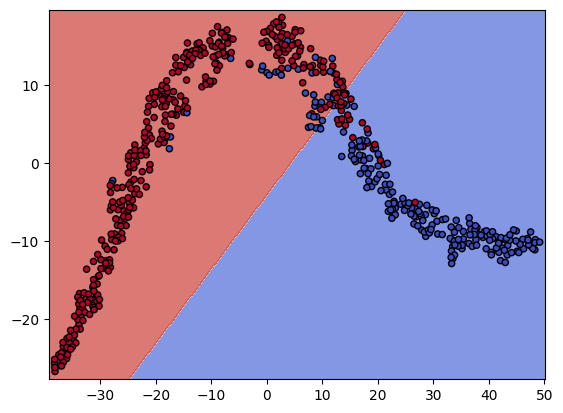

In [115]:
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# 데이터가 너무 퍼져있어서임

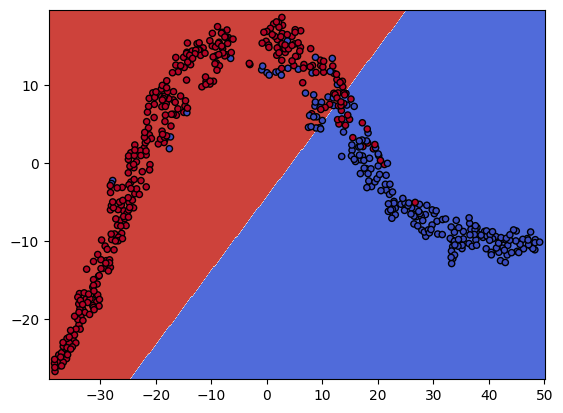

In [116]:
model.fit(X_comp, y) #preidict를 함수안에 정의 했기 때문에 아래 컨타워 함수를 써줌
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=1.0)#cmap 은 컬러맵으로 쿨웜(빨파)를 줌, alpha는 투명 불투명 정도진하기 1~0까지

plt.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k' ) #c는 컬러고 y값으로 한다 s는 사이즈 엣지컬러는 k로함
# 결과 그림은 지금 97퍼센트 정도 분류를 잘 한것임 물론 겹치는 부분도 있지만 TSNE로 차원을 축소하여 시각화 했기때문에 겹친것이지
# 실제로는 97퍼센트로 잘 분류 되었을 것임

In [117]:
# 크로스 벨류로 파이프 라인 만들기
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator= estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
# 크로스 val로 값을 나타내줌

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.01604056, 0.0147121 , 0.01024485, 0.01264596, 0.00828958]),
 'score_time': array([0.00286508, 0.00214314, 0.00295949, 0.00195026, 0.00162792]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [118]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))]) #기본이 RBF일거임

param_grid = [{'model__gamma':['scale', 'auto'],  #linear는 감마값으로 해야됨
               'model__C': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [119]:
#  감마가 스케일이며 c값이 0.1일때 최적의모델로 나옴
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

붓꽃

In [120]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
model  = SVC(kernel='linear') # rbf에서 linear로 변경
model.fit(X_train, y_train)

SVC(kernel='linear')

In [123]:
print('SVC학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVC평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

SVC학습 데이터 점수 : 0.9666666666666667
SVC평가 데이터 점수 : 0.9333333333333333


In [124]:
#시각화가 아래 있지만 변경해야 할것 같음 함수로 만들예정임
#svr과 다르게 svc는 데이터를 보여준후 클래스 구분이 되는 시각화를 추가
#meshgrid  : 좌표 벡터에서 좌표 행렬을 반환합니다. 1차원 좌표 배열 x1, x2,…, xn이 주어지면 N차원 직사각형 격자를 만드는 함수
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1 # 데이터에서 최소 좌표와 최대 자표를 지정할때 -1 +1을 해줘서 좀더 여유있게 해주기 위함
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), #h는 간격 0.02 r간격으로 그리드 좌표를 만듬
                         np.arange(y_min, y_max, h))
    return xx, yy

In [125]:
# 컨타워 함수를 만들어줌
def plot_contours(clf, xx, yy, **params):
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel은 평평하게 만들기 flatten과 유사
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy, Z, **params) #컨투어를 그리는 contourf함수에 **params내에 색깔 등을 넣어줄수 있으므로 파람으로 받아옴
    return out
# 두개를 잘 쓰면 classfication visualization도 잘 활용할 수 있음
# https://velog.io/@hajeongjj/np.meshgrid 참고

In [126]:
# 서포트백터는 차원을 늘려줘서 분류를 하게되는데 TSNE로 차원을 낮춰줘서 시각화를 할 수 있음
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] #0과 1로 구분을 해줌
xx, yy = make_meshgrid(X0, X1)

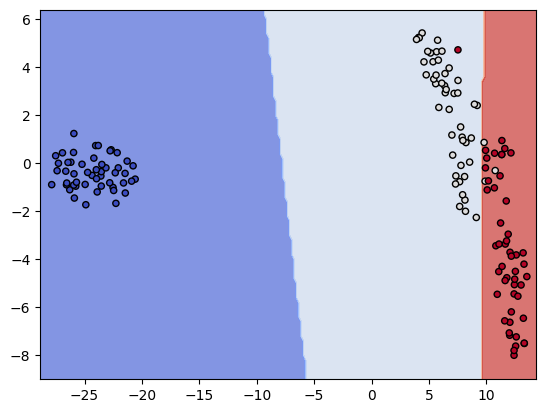

In [127]:
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
# 데이터가 너무 퍼져있어서임

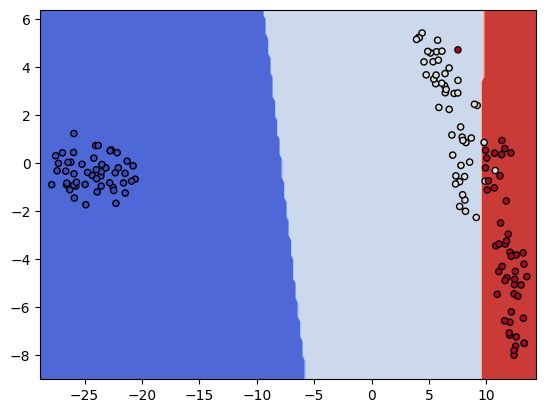

In [128]:
model.fit(X_comp, y) #preidict를 함수안에 정의 했기 때문에 아래 컨타워 함수를 써줌
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=1.0)#cmap 은 컬러맵으로 쿨웜(빨파)를 줌, alpha는 투명 불투명 정도진하기 1~0까지

plt.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k' ) #c는 컬러고 y값으로 한다 s는 사이즈 엣지컬러는 k로함
# 결과 그림은 지금 97퍼센트 정도 분류를 잘 한것임 물론 겹치는 부분도 있지만 TSNE로 차원을 축소하여 시각화 했기때문에 겹친것이지
# 실제로는 97퍼센트로 잘 분류 되었을 것임

In [129]:
# 크로스 벨류로 파이프 라인 만들기
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator= estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
# 크로스 val로 값을 나타내줌

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01076913, 0.01153326, 0.01353121, 0.00304937, 0.00270462]),
 'score_time': array([0.00253439, 0.00132632, 0.00328565, 0.00142431, 0.00116634]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [130]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))]) #기본이 RBF일거임

param_grid = [{'model__gamma':['scale', 'auto'],  #linear는 감마값으로 해야됨
               'model__C': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [131]:
#  감마가 스케일이며 c값이 1일때 최적의모델로 나옴
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

와인

In [132]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [133]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
model  = SVC(kernel='linear') # rbf에서 linear로 변경
model.fit(X_train, y_train)

SVC(kernel='linear')

In [135]:
print('SVC학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVC평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))
#매우높은 성능임 클래스가 3개밖에 없어서 그럴수도 있음

SVC학습 데이터 점수 : 1.0
SVC평가 데이터 점수 : 0.9722222222222222


In [136]:
#시각화가 아래 있지만 변경해야 할것 같음 함수로 만들예정임
#svr과 다르게 svc는 데이터를 보여준후 클래스 구분이 되는 시각화를 추가
#meshgrid  : 좌표 벡터에서 좌표 행렬을 반환합니다. 1차원 좌표 배열 x1, x2,…, xn이 주어지면 N차원 직사각형 격자를 만드는 함수
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1 # 데이터에서 최소 좌표와 최대 자표를 지정할때 -1 +1을 해줘서 좀더 여유있게 해주기 위함
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), #h는 간격 0.02 r간격으로 그리드 좌표를 만듬
                         np.arange(y_min, y_max, h))
    return xx, yy

In [137]:
# 컨타워 함수를 만들어줌
def plot_contours(clf, xx, yy, **params):
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel은 평평하게 만들기 flatten과 유사
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy, Z, **params) #컨투어를 그리는 contourf함수에 **params내에 색깔 등을 넣어줄수 있으므로 파람으로 받아옴
    return out
# 두개를 잘 쓰면 classfication visualization도 잘 활용할 수 있음
# https://velog.io/@hajeongjj/np.meshgrid 참고

In [138]:
# 서포트백터는 차원을 늘려줘서 분류를 하게되는데 TSNE로 차원을 낮춰줘서 시각화를 할 수 있음
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] #0과 1로 구분을 해줌
xx, yy = make_meshgrid(X0, X1)

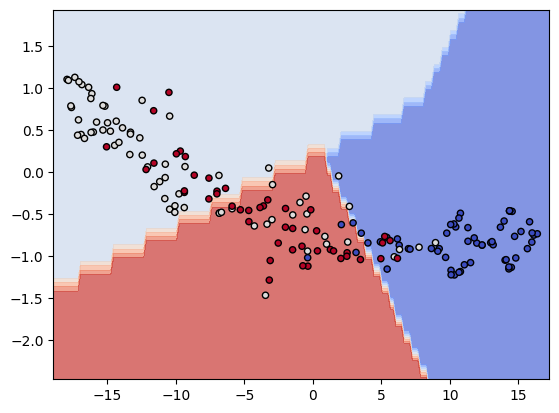

In [139]:
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#데이터가 길게 되어있음에도 리니어 형태지만 선택을 잘 하고 있음

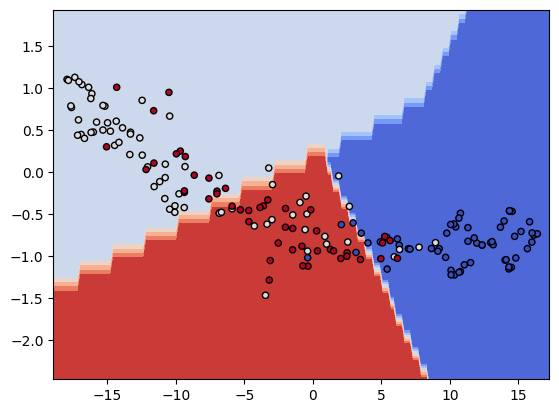

In [140]:
model.fit(X_comp, y) #preidict를 함수안에 정의 했기 때문에 아래 컨타워 함수를 써줌
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=1.0)#cmap 은 컬러맵으로 쿨웜(빨파)를 줌, alpha는 투명 불투명 정도진하기 1~0까지

plt.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k' ) #c는 컬러고 y값으로 한다 s는 사이즈 엣지컬러는 k로함
# 결과 그림은 지금 97퍼센트 정도 분류를 잘 한것임 물론 겹치는 부분도 있지만 TSNE로 차원을 축소하여 시각화 했기때문에 겹친것이지
# 실제로는 97퍼센트로 잘 분류 되었을 것임

In [141]:
# 크로스 벨류로 파이프 라인 만들기
estimator = make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator= estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
# 크로스 val로 값을 나타내줌

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00489259, 0.00372362, 0.00599217, 0.00434804, 0.00309491]),
 'score_time': array([0.00123668, 0.00269365, 0.00148153, 0.00133276, 0.00119257]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [142]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='linear'))]) #기본이 RBF일거임

param_grid = [{'model__gamma':['scale', 'auto'],  #linear는 감마값으로 해야됨
               'model__C': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

Kernel SVC

유방암

In [143]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [144]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
model  = SVC(kernel='rbf') # rbf에서 linear로 변경
model.fit(X_train, y_train)

SVC()

In [146]:
print('SVC학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVC평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))
#매우높은 성능임 클래스가 3개밖에 없어서 그럴수도 있음

SVC학습 데이터 점수 : 0.989010989010989
SVC평가 데이터 점수 : 0.9824561403508771


In [147]:
#시각화가 아래 있지만 변경해야 할것 같음 함수로 만들예정임
#svr과 다르게 svc는 데이터를 보여준후 클래스 구분이 되는 시각화를 추가
#meshgrid  : 좌표 벡터에서 좌표 행렬을 반환합니다. 1차원 좌표 배열 x1, x2,…, xn이 주어지면 N차원 직사각형 격자를 만드는 함수
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1 # 데이터에서 최소 좌표와 최대 자표를 지정할때 -1 +1을 해줘서 좀더 여유있게 해주기 위함
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), #h는 간격 0.02 r간격으로 그리드 좌표를 만듬
                         np.arange(y_min, y_max, h))
    return xx, yy

In [148]:
# 컨타워 함수를 만들어줌
def plot_contours(clf, xx, yy, **params):
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel은 평평하게 만들기 flatten과 유사
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy, Z, **params) #컨투어를 그리는 contourf함수에 **params내에 색깔 등을 넣어줄수 있으므로 파람으로 받아옴
    return out
# 두개를 잘 쓰면 classfication visualization도 잘 활용할 수 있음
# https://velog.io/@hajeongjj/np.meshgrid 참고

In [149]:
# 서포트백터는 차원을 늘려줘서 분류를 하게되는데 TSNE로 차원을 낮춰줘서 시각화를 할 수 있음
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] #0과 1로 구분을 해줌
xx, yy = make_meshgrid(X0, X1)

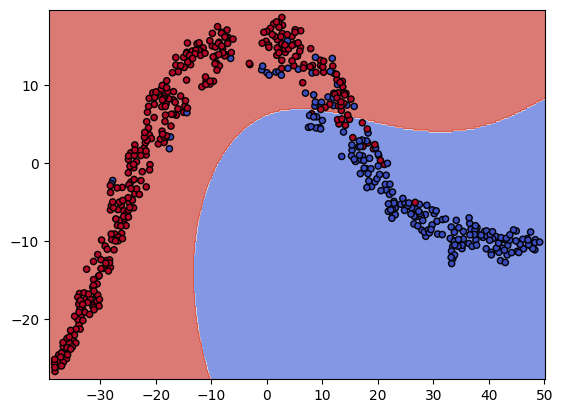

In [150]:
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#rbf라 선형과 다르게 나옴 비선형을 반영해서 선택됨

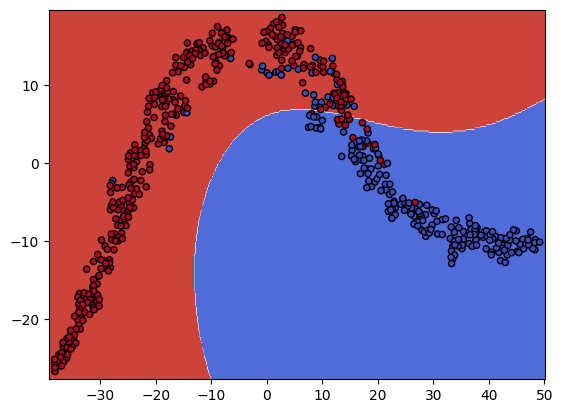

In [151]:
model.fit(X_comp, y) #preidict를 함수안에 정의 했기 때문에 아래 컨타워 함수를 써줌
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=1.0)#cmap 은 컬러맵으로 쿨웜(빨파)를 줌, alpha는 투명 불투명 정도진하기 1~0까지

plt.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k' ) #c는 컬러고 y값으로 한다 s는 사이즈 엣지컬러는 k로함
# 결과 그림은 지금 97퍼센트 정도 분류를 잘 한것임 물론 겹치는 부분도 있지만 TSNE로 차원을 축소하여 시각화 했기때문에 겹친것이지
# 실제로는 97퍼센트로 잘 분류 되었을 것임

In [152]:
# 크로스 벨류로 파이프 라인 만들기
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
cross_validate(
    estimator= estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
# 크로스 val로 값을 나타내줌
# 결과 값이 97 , 95 1  96등 좋은 값으로 나옴

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.01341033, 0.03472161, 0.01600218, 0.03564835, 0.01539063]),
 'score_time': array([0.00956368, 0.01674581, 0.01356864, 0.0071888 , 0.0030396 ]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [153]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))]) #기본이 RBF일거임

param_grid = [{'model__gamma':['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [154]:
#  감마가 스케일이며 c값이 0.1일때 최적의모델로 나옴
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

붓꽃

In [155]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [156]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
model  = SVC(kernel='rbf') # rbf에서 linear로 변경
model.fit(X_train, y_train)

SVC()

In [158]:
print('SVC학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVC평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))
#매우높은 성능임 클래스가 3개밖에 없어서 그럴수도 있음

SVC학습 데이터 점수 : 0.9833333333333333
SVC평가 데이터 점수 : 0.9


In [159]:
#시각화가 아래 있지만 변경해야 할것 같음 함수로 만들예정임
#svr과 다르게 svc는 데이터를 보여준후 클래스 구분이 되는 시각화를 추가
#meshgrid  : 좌표 벡터에서 좌표 행렬을 반환합니다. 1차원 좌표 배열 x1, x2,…, xn이 주어지면 N차원 직사각형 격자를 만드는 함수
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1 # 데이터에서 최소 좌표와 최대 자표를 지정할때 -1 +1을 해줘서 좀더 여유있게 해주기 위함
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), #h는 간격 0.02 r간격으로 그리드 좌표를 만듬
                         np.arange(y_min, y_max, h))
    return xx, yy

In [160]:
# 컨타워 함수를 만들어줌
def plot_contours(clf, xx, yy, **params):
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel은 평평하게 만들기 flatten과 유사
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy, Z, **params) #컨투어를 그리는 contourf함수에 **params내에 색깔 등을 넣어줄수 있으므로 파람으로 받아옴
    return out
# 두개를 잘 쓰면 classfication visualization도 잘 활용할 수 있음
# https://velog.io/@hajeongjj/np.meshgrid 참고

In [161]:
# 서포트백터는 차원을 늘려줘서 분류를 하게되는데 TSNE로 차원을 낮춰줘서 시각화를 할 수 있음
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] #0과 1로 구분을 해줌
xx, yy = make_meshgrid(X0, X1)

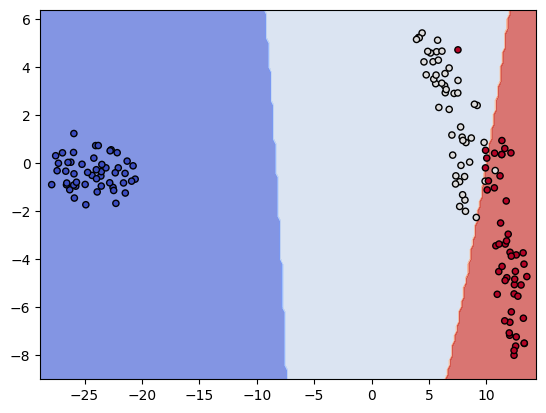

In [162]:
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#데이터가 길게 되어있음에도 리니어 형태지만 선택을 잘 하고 있음

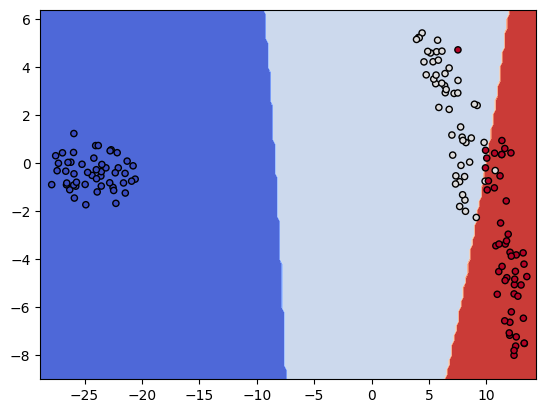

In [163]:
model.fit(X_comp, y) #preidict를 함수안에 정의 했기 때문에 아래 컨타워 함수를 써줌
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=1.0)#cmap 은 컬러맵으로 쿨웜(빨파)를 줌, alpha는 투명 불투명 정도진하기 1~0까지

plt.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k' ) #c는 컬러고 y값으로 한다 s는 사이즈 엣지컬러는 k로함
# 결과 그림은 지금 97퍼센트 정도 분류를 잘 한것임 물론 겹치는 부분도 있지만 TSNE로 차원을 축소하여 시각화 했기때문에 겹친것이지
# 실제로는 97퍼센트로 잘 분류 되었을 것임

In [164]:
# 크로스 벨류로 파이프 라인 만들기
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
cross_validate(
    estimator= estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
# [0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ]로 결과가 좋게 나옴

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00875878, 0.00407839, 0.003371  , 0.00947332, 0.00477815]),
 'score_time': array([0.01041484, 0.00144863, 0.01516604, 0.00739884, 0.00146866]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [165]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))]) #기본이 RBF일거임

param_grid = [{'model__gamma':['scale', 'auto'],  #linear는 감마값으로 해야됨
               'model__C': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [166]:
#  감마가 스케일이며 c값이 0.1일때 최적의모델로 나옴
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

와인

In [167]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [168]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train  = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [169]:
model  = SVC(kernel='rbf') # rbf에서 linear로 변경
model.fit(X_train, y_train)

SVC()

In [170]:
print('SVC학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('SVC평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))
#매우높은 성능임 클래스가 3개밖에 없어서 그럴수도 있음

SVC학습 데이터 점수 : 1.0
SVC평가 데이터 점수 : 1.0


In [171]:
#시각화가 아래 있지만 변경해야 할것 같음 함수로 만들예정임
#svr과 다르게 svc는 데이터를 보여준후 클래스 구분이 되는 시각화를 추가
#meshgrid  : 좌표 벡터에서 좌표 행렬을 반환합니다. 1차원 좌표 배열 x1, x2,…, xn이 주어지면 N차원 직사각형 격자를 만드는 함수
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x.min()-1, x.max()+1 # 데이터에서 최소 좌표와 최대 자표를 지정할때 -1 +1을 해줘서 좀더 여유있게 해주기 위함
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), #h는 간격 0.02 r간격으로 그리드 좌표를 만듬
                         np.arange(y_min, y_max, h))
    return xx, yy

In [172]:
# 컨타워 함수를 만들어줌
def plot_contours(clf, xx, yy, **params):
    Z= clf.predict(np.c_[xx.ravel(), yy.ravel()]) #ravel은 평평하게 만들기 flatten과 유사
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy, Z, **params) #컨투어를 그리는 contourf함수에 **params내에 색깔 등을 넣어줄수 있으므로 파람으로 받아옴
    return out
# 두개를 잘 쓰면 classfication visualization도 잘 활용할 수 있음
# https://velog.io/@hajeongjj/np.meshgrid 참고

In [173]:
# 서포트백터는 차원을 늘려줘서 분류를 하게되는데 TSNE로 차원을 낮춰줘서 시각화를 할 수 있음
X_comp = TSNE(n_components=2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1] #0과 1로 구분을 해줌
xx, yy = make_meshgrid(X0, X1)

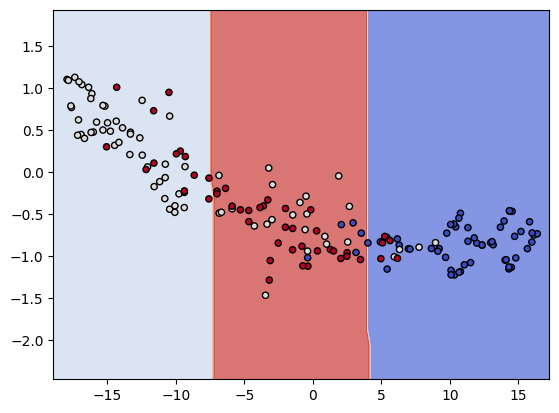

In [174]:
model.fit(X_comp, y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#데이터가 길게 되어있음에도 리니어 형태지만 선택을 잘 하고 있음

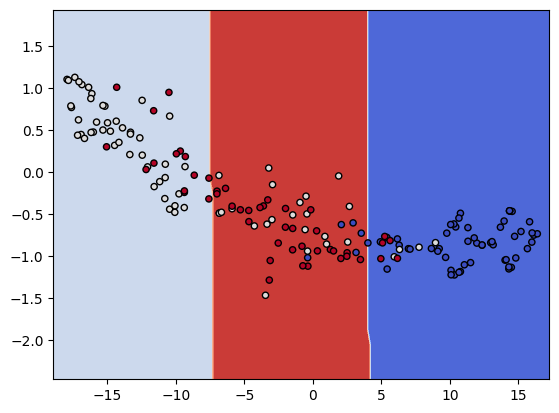

In [175]:
model.fit(X_comp, y) #preidict를 함수안에 정의 했기 때문에 아래 컨타워 함수를 써줌
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=1.0)#cmap 은 컬러맵으로 쿨웜(빨파)를 줌, alpha는 투명 불투명 정도진하기 1~0까지

plt.scatter(X0, X1, c=y,cmap=plt.cm.coolwarm, s=20, edgecolors='k' ) #c는 컬러고 y값으로 한다 s는 사이즈 엣지컬러는 k로함
# 결과 그림은 지금 97퍼센트 정도 분류를 잘 한것임 물론 겹치는 부분도 있지만 TSNE로 차원을 축소하여 시각화 했기때문에 겹친것이지
# 실제로는 97퍼센트로 잘 분류 되었을 것임

In [176]:
# 크로스 벨류로 파이프 라인 만들기
estimator = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
cross_validate(
    estimator= estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
# [1.        , 0.97222222, 0.94444444, 1.        , 1.        ]로 결과가 좋게 나옴

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00543809, 0.00849342, 0.01028347, 0.00790548, 0.00772595]),
 'score_time': array([0.00627327, 0.00172997, 0.00752521, 0.00162911, 0.00167799]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [177]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(kernel='rbf'))]) #기본이 RBF일거임

param_grid = [{'model__gamma':['scale', 'auto'],  #linear는 감마값으로 해야됨
               'model__C': [1.0, 0.1, 0.01]}]
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True)
gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [178]:
#  감마가 스케일이며 c값이 0.1일때 최적의모델로 나옴
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])